<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_4_123b1f047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1489738177.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,3), plt.hist(img1.ravel(), 256, [0,256]), plt.title("Original Histogram")
/tmp/ipython-input-1489738177.py:55: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,4), plt.hist(img2.ravel(), 256, [0,256]), plt.title(name + " Histogram")


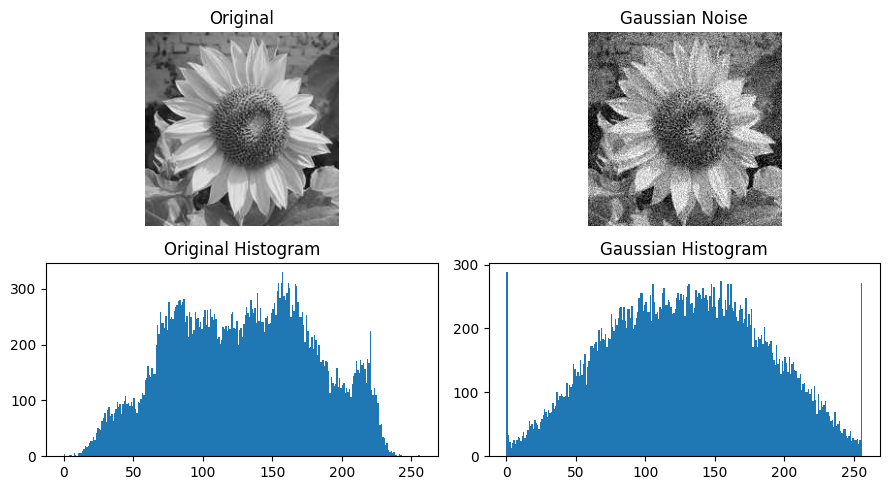

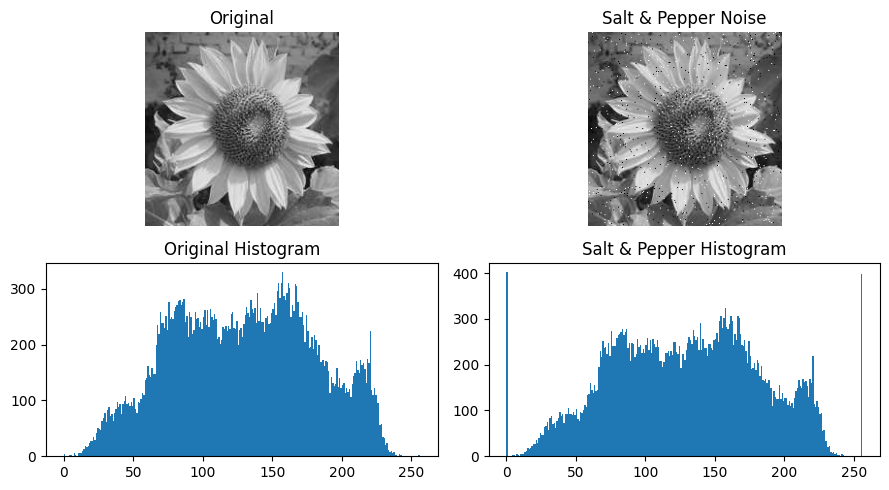

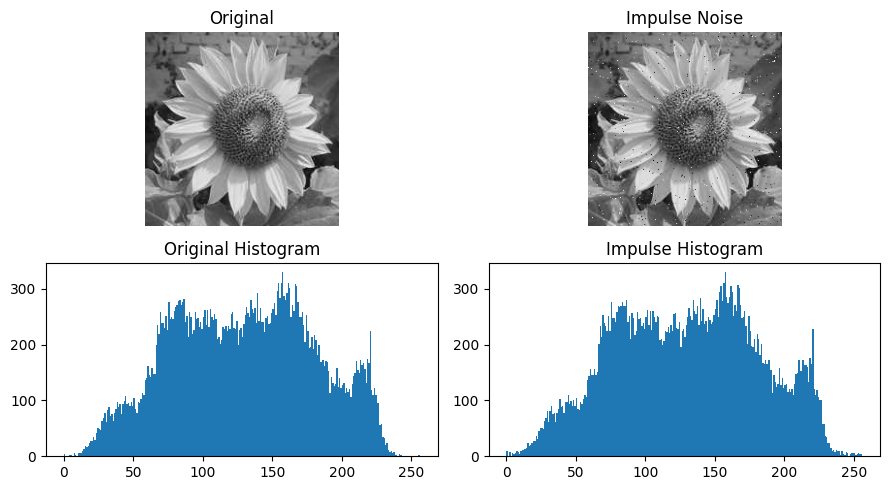

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("synflower.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image not found! Please check the path.")
else:

    def gaussian_noise(image, mean=0, sigma=25):
        noise = np.random.normal(mean, sigma, image.shape)
        noisy_img = image + noise
        noisy_img = np.clip(noisy_img, 0, 255)
        return noisy_img.astype(np.uint8)

    def salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
        noisy_img = np.copy(image)
        total_pixels = image.size

        num_salt = int(salt_prob * total_pixels)
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
        noisy_img[coords[0], coords[1]] = 255

        num_pepper = int(pepper_prob * total_pixels)
        coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
        noisy_img[coords[0], coords[1]] = 0

        return noisy_img

    def impulse_noise(image, prob=0.02):
        noisy_img = np.copy(image)
        total_pixels = image.size
        num_noisy = int(prob * total_pixels)
        coords = [np.random.randint(0, i - 1, num_noisy) for i in image.shape]
        noisy_img[coords[0], coords[1]] = np.random.randint(0, 256, num_noisy)
        return noisy_img


    gauss = gaussian_noise(img)
    sp = salt_pepper_noise(img)
    impulse = impulse_noise(img)


    def show(img1, img2, name):
        plt.figure(figsize=(9,5))
        plt.subplot(2,2,1), plt.imshow(img1, cmap='gray'), plt.title("Original"), plt.axis('off')
        plt.subplot(2,2,2), plt.imshow(img2, cmap='gray'), plt.title(name + " Noise"), plt.axis('off')
        plt.subplot(2,2,3), plt.hist(img1.ravel(), 256, [0,256]), plt.title("Original Histogram")
        plt.subplot(2,2,4), plt.hist(img2.ravel(), 256, [0,256]), plt.title(name + " Histogram")
        plt.tight_layout()
        plt.show()


    show(img, gauss, "Gaussian")
    show(img, sp, "Salt & Pepper")
    show(img, impulse, "Impulse")
